In [1811]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
from torch.utils.data import TensorDataset

In [1812]:
#Loading the data set
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston_raw = pd.read_csv('../data/housing.csv', header=None, delimiter=r"\s+", names=column_names)

data = boston_raw.copy()

In [1813]:
#let us try to visualize our data 
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [1814]:
#Splitting the dataset into  training and testing dataset
train, test = train_test_split(data,  test_size = 0.2)
train_targets = train.pop("MEDV")
test_targets = test.pop("MEDV")

train_stats = train.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
CRIM,404.0,3.615272,8.983730,0.00632,0.07971,0.250895,3.594927,88.9762
ZN,404.0,11.831683,23.986584,0.00000,0.00000,0.000000,12.500000,95.0000
INDUS,404.0,11.137871,6.911835,0.74000,5.13000,9.690000,18.100000,27.7400
CHAS,404.0,0.079208,0.270398,0.00000,0.00000,0.000000,0.000000,1.0000
NOX,404.0,0.553970,0.115544,0.38500,0.44900,0.538000,0.624000,0.8710
RM,404.0,6.295725,0.679225,3.56100,5.89750,6.211500,6.621750,8.7800
AGE,404.0,68.997772,28.126022,2.90000,45.07500,78.400000,94.100000,100.0000
DIS,404.0,3.800237,2.105454,1.12960,2.10915,3.239250,5.216700,12.1265
RAD,404.0,9.423267,8.715894,1.00000,4.00000,5.000000,24.000000,24.0000
TAX,404.0,406.091584,169.547929,187.00000,277.00000,329.500000,666.000000,711.0000


In [1815]:
train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
158,1.34284,0.0,19.58,0,0.605,6.066,100.0,1.7573,5,403.0,14.7,353.89,6.43
76,0.10153,0.0,12.83,0,0.437,6.279,74.5,4.0522,5,398.0,18.7,373.66,11.97
357,3.84970,0.0,18.10,1,0.770,6.395,91.0,2.5052,24,666.0,20.2,391.34,13.27
333,0.05083,0.0,5.19,0,0.515,6.316,38.1,6.4584,5,224.0,20.2,389.71,5.68
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64


In [1816]:
test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
213,0.14052,0.0,10.59,0,0.489,6.375,32.3,3.9454,4,277.0,18.6,385.81,9.38
431,10.06230,0.0,18.10,0,0.584,6.833,94.3,2.0882,24,666.0,20.2,81.33,19.69
392,11.57790,0.0,18.10,0,0.700,5.036,97.0,1.7700,24,666.0,20.2,396.90,25.68
145,2.37934,0.0,19.58,0,0.871,6.130,100.0,1.4191,5,403.0,14.7,172.91,27.80
413,28.65580,0.0,18.10,0,0.597,5.155,100.0,1.5894,24,666.0,20.2,210.97,20.08


In [1817]:
def df_to_tensor(df):
    return torch.from_numpy(df.values).float()
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

In [1818]:
#Converting training data into tensors for Pytorch

train_dataset = TensorDataset(df_to_tensor(norm(train)), torch.Tensor([[x] for x in list(train_targets)]))
x_test, y_test = (df_to_tensor(norm(test)),[x for x in list(test_targets)])

train_dataloader = DataLoader(train_dataset,batch_size=16)
# test_dataloader = DataLoader(test_dataset,batch_size=5)



In [1819]:
class NeuralNetwork(nn.Module):
    def __init__(self,in_size, out_size):
        super(NeuralNetwork, self).__init__()
        # self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(in_size, 5),
            nn.ReLU(),
            nn.Linear(5, 5),
            nn.ReLU(),
            nn.Linear(5, out_size),
            )

    def forward(self, x):
        # x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [1820]:
# Define model
model = NeuralNetwork(13, 1) # nn.Linear(in_features,out_features)


In [1821]:
#Define the loss function
loss_fun = nn.MSELoss()

In [1822]:
# Define SGD optimizer with learning rate 0.01
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [1823]:
# Utility function to train the model
def lrmodel(num_epochs, model, loss_fun, optimizer, train_dl):
    
    # Repeat for given number of epochs
    for epoch in range(num_epochs):
        
        # Train with batches of data
        for xb,yb in train_dl:
            
            # 1. Generate predictions
            pred = model(xb)
            
            # 2. Calculate loss
            loss = loss_fun(pred, yb)
            
            # 3. Compute gradients
            loss.backward()
            
            # 4. Update parameters using gradients
            optimizer.step()
            
            # 5. Reset the gradients to zero
            optimizer.zero_grad()
        
        # Print the progress
        if (epoch+1) % 100 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

In [1824]:
#Training for 100 epochs
num_epochs=1000
lrmodel(num_epochs, model, loss_fun, optimizer, train_dataloader)


Epoch [100/1000], Loss: 252.8560
Epoch [200/1000], Loss: 182.7329
Epoch [300/1000], Loss: 142.5110
Epoch [400/1000], Loss: 89.1865
Epoch [500/1000], Loss: 57.7615
Epoch [600/1000], Loss: 45.5330
Epoch [700/1000], Loss: 38.4007
Epoch [800/1000], Loss: 33.1105
Epoch [900/1000], Loss: 29.1615
Epoch [1000/1000], Loss: 25.9738


In [1825]:
#Predicting for X_test
y_pred_test = model(x_test)

In [1826]:
#Converting predictions from tensor objects into a list
import numpy
y_pred_test = [y_pred_test[x].item() for x in range(len(y_pred_test))]
# Comparing Actual and predicted values
# print(numpy.multiply(y_test,1000))
df = {}
df['Actual Observation'] = numpy.multiply(y_test,1000)
df['Predicted Salary'] = numpy.multiply(y_pred_test,1000) 
df = pd.DataFrame(df)
print(df)

     Actual Observation  Predicted Salary
0               28100.0      26008.790970
1               14100.0      15244.089127
2                9700.0      13634.104729
3               13800.0      12496.068954
4               16300.0      12927.014351
..                  ...               ...
97              17500.0      16330.705643
98              24500.0      19357.385635
99              10500.0      14036.609650
100             14500.0      15561.986923
101             24800.0      24000.387192

[102 rows x 2 columns]


In [1827]:
from sklearn.metrics import mean_absolute_error

# Let's check how much we are off on average
# y_pred = model(df_to_tensor(norm(train)))
mae = mean_absolute_error(df['Actual Observation'], df['Predicted Salary'])

print(f"We are off on average by {round(mae, 2)} US dollars, while the mean price of a house in the dataset is {round(test_targets.mean()*1000, 2)}.")

We are off on average by 3124.33 US dollars, while the mean price of a house in the dataset is 22848.04.


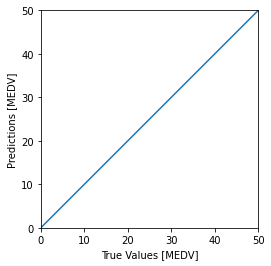

In [1828]:
a = plt.axes(aspect='equal')
plt.scatter(df['Actual Observation'],  df['Predicted Salary'])
plt.xlabel('True Values [MEDV]')
plt.ylabel('Predictions [MEDV]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)